In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

from pathlib import Path

In [2]:
# Load data
data1 = pd.read_csv(Path.cwd() / '..' / 'data' / '22_12_29_ga.csv')
data2 = pd.read_pickle(Path.cwd() / '..' / 'data' / '22_12_29_gains.pkl')
errors = pickle.load(open(Path.cwd() / '..' / 'data' / 'df_errors.pkl', 'rb'))

In [29]:
# add the Fitness column to the gains dataframe
data2['Fitness'] = data1['Fitness']

minus_err = errors["Minus_Errs"].values
plus_err = errors["Plus_Errs"].values
X = data2.drop(['Fitness'], axis=1).values
y = data2['Fitness'].values
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,2211,2212,2213,2214,2215,2216,2217,2218,2219,Fitness
0,-78.92250,-20.20142,-14.20832,-10.72818,-8.287613,-6.425362,-4.936625,-3.712855,-2.689946,-1.827229,...,2.710684,3.200076,3.317596,2.845784,1.675963,-0.331046,-3.557913,-9.398011,-42.80971,5.20443
1,-72.21149,-20.24448,-14.24718,-10.75049,-8.285447,-6.392445,-4.868047,-3.605082,-2.540888,-1.636278,...,5.882415,6.369466,6.209387,5.597448,4.455757,2.548634,-0.590530,-6.430088,-46.05953,5.28597
2,-70.43326,-19.69371,-13.70804,-10.22852,-7.786266,-5.920996,-4.428332,-3.199993,-2.172092,-1.304153,...,5.217521,5.819272,5.802389,5.146962,3.821076,1.699744,-1.612868,-7.560116,-45.14138,5.11788
3,-99.54229,-20.43990,-14.43266,-10.93338,-8.467863,-6.575438,-5.052306,-3.791124,-2.729137,-1.827089,...,3.741359,3.691850,3.117771,2.661602,2.007964,0.573368,-2.223904,-7.819453,-49.03512,5.15964
4,-86.00756,-21.01388,-14.96708,-11.40168,-8.846874,-6.845640,-5.198454,-3.802742,-2.600839,-1.558722,...,-14.112510,-3.101032,-0.429442,-2.885479,-9.907563,-14.552930,-12.666010,-15.974490,-41.49732,4.61805


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train_plus_errs, y_test_plus_errs, y_train_minus_errs, y_test_minus_errs = train_test_split(plus_err, minus_err, test_size=0.20, random_state=42)


mse_list = []
for i in range(20):
    xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.21,
                max_depth = i, alpha = 3, n_estimators = 500)

    xgb_model.fit(X_train,y_train)
    
    mse_list.append(sklearn.metrics.mean_squared_error(y_test, xgb_model.predict(X_test)))

print(mse_list)
    
    

[0.031295707147565646, 0.02534395332086632, 0.02636212831700367, 0.026724772498408076, 0.027541118514925612, 0.028019362410696837, 0.028324870825965603, 0.02851991850625338, 0.028515327611480918, 0.029390607618739968, 0.0290896038948782, 0.02861723128237284, 0.0294590345095661, 0.028849828286280965, 0.028739267323157545, 0.028958432632423342, 0.028376964961583154, 0.02960143390691633, 0.029325408269976014, 0.028936675089208035]


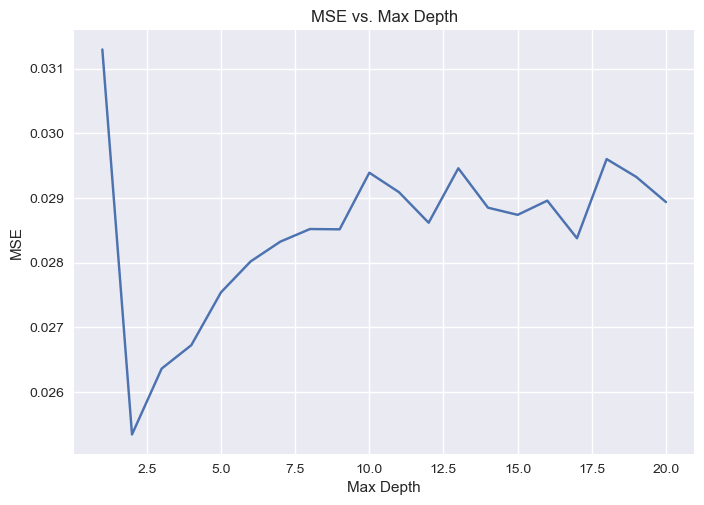

In [12]:
# Plot the results
plt.plot(range(1, len(mse_list)+1), mse_list)
plt.title("MSE vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("MSE")
plt.show()


In [25]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 2, alpha = 4, n_estimators = 500, random_state=42)

xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)
    

0.025774524902909327


Mean squared error: 0.02577


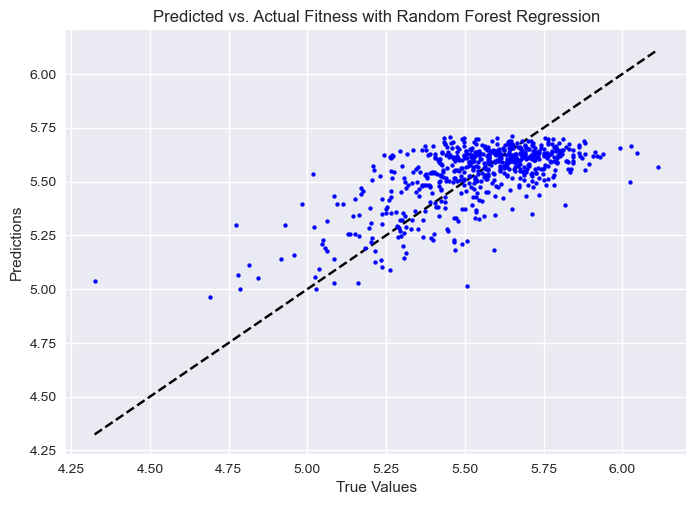

In [26]:
#print the mean squared error
print("Mean squared error: %.5f" % mse)
# Plot the predictions vs ground truth
# set style to seaborn
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, s=30, c='b', marker='.', zorder=10)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Random Forest Regression')
plt.show()

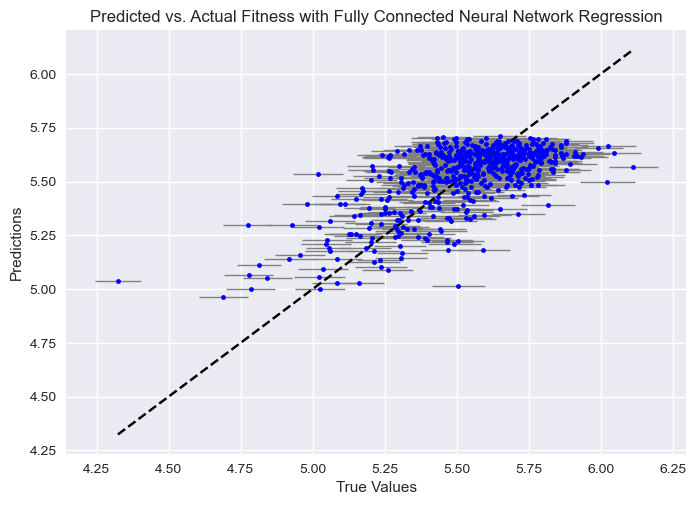

In [27]:
# set style to seaborn
plt.style.use('seaborn')
plt.errorbar(y_test, y_pred, xerr=[y_test_minus_errs, y_test_plus_errs], fmt='.', color='b',
                ecolor='gray', elinewidth=1, capsize=0.8)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

In [28]:
# calculate the percentage of the predicted data that is within the error bars
total_in = 0
for i in range(len(y_test)):
    if y_test[i] - y_test_minus_errs[i] <= y_pred[i] <= y_test[i] + y_test_plus_errs[i]:
        total_in += 1
print("Percentage of predicted data within error bars: %.2f" % (total_in / len(y_test) * 100))

Percentage of predicted data within error bars: 43.55
